# Titanic Survival Prediction

## **1**. Import Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## **2**. Import Dataset

In [154]:
Titanic = pd.read_csv('/content/Titanic-Dataset.csv')
print(Titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## **3**. Explore Dataset

In [155]:
Titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
Titanic.shape

(891, 12)

In [157]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **4**. Check whether the dataset contains a missing value or not

In [159]:
null=Titanic.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## **5**. Clean the dataset

In [160]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
# Drop columns
Titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Fill missing values in 'Age' with the median
Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

In [162]:
Titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [163]:
Titanic

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,28.0
889,1,1,male,26.0


## **6**. Dataset Analysis

# How many people are survived and not

In [164]:
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# How many people males and females

In [165]:
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Merge between Sex and Survived

In [166]:
Titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Sex', ylabel='count'>

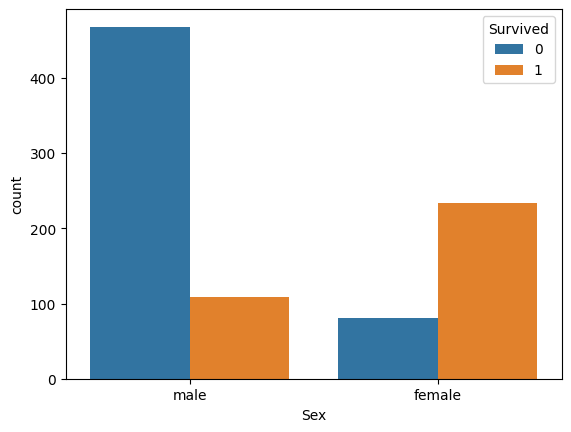

In [167]:
sns.countplot(x=Titanic['Sex'], hue=Titanic['Survived'])


# Show classes

<Axes: xlabel='Survived', ylabel='count'>

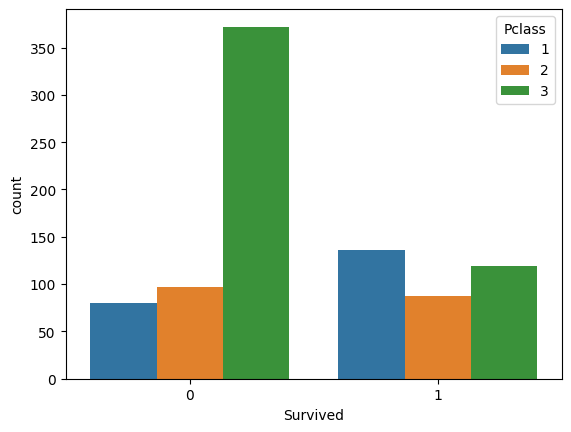

In [168]:
sns.countplot(x=Titanic['Survived'], hue=Titanic['Pclass'])

#Show amount of Ages

<Axes: xlabel='Age', ylabel='Count'>

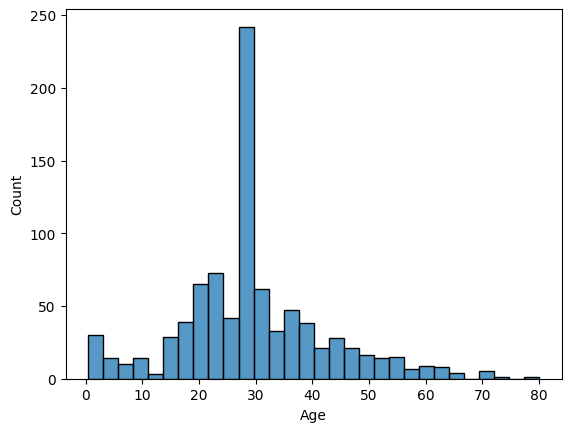

In [169]:
sns.histplot(Titanic.Age)

## **7**. Transorm data to numerical

In [170]:
Titanic.Sex = pd.get_dummies(Titanic.Sex , drop_first=True)
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB


# **8**. Create Model that predicts whether a passenger on the Titanic survived or not.

In [171]:
X = Titanic.drop('Survived',axis=1)
Y = Titanic['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [172]:
log = LogisticRegression(random_state=0)
log.fit(X_train , Y_train)

LogisticRegression(random_state=0)

In [173]:
pred = log.predict(X_test)
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1])

In [174]:
accuracy_score(pred,Y_test)

0.7541899441340782

In [175]:
X_train

,Pclass,Sex,Age
356,1,0,22.0
572,1,1,36.0
169,3,1,28.0
622,3,1,20.0
497,3,1,28.0
...,...,...,...
22,3,0,15.0
762,3,1,20.0
211,2,0,35.0
167,3,0,45.0


The First value represent the Pclass ( 1 or 2 or 3 ) , 2nd value for Sex ( Male(1) or Female (0) Finally 3nd Value for Age

In [176]:
import warnings
warnings.filterwarnings('ignore')

# Input values : [Pclass, Sex, Age]
result= log.predict([[3,1,10]])

if(result==0):
  print('Not Survived')
else:
  print('Survived')

Not Survived
